C:\Users\22013361\AppData\Local\anaconda3\envs\c338\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


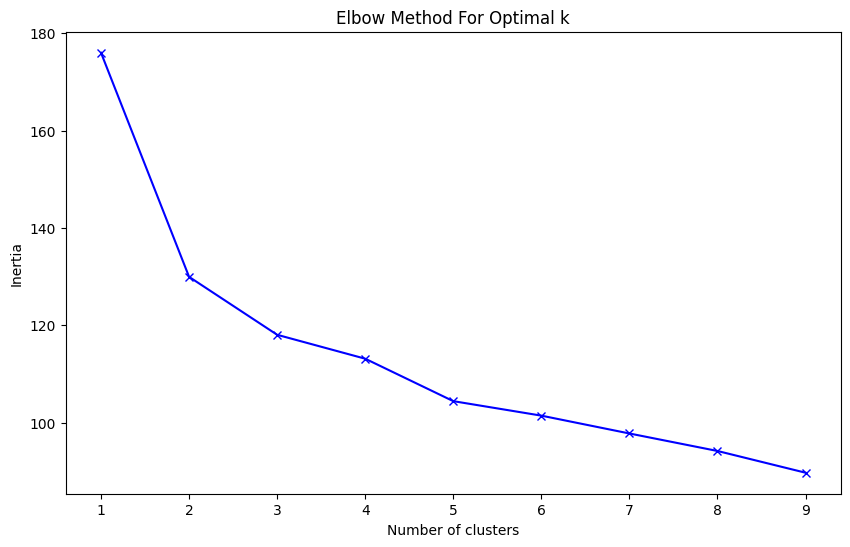

         Skill 3  Skill 3 Cluster
0      Adaptable                0
1            Nan                1
2   Entertaining                0
3            Nan                1
4            Nan                1
5  Communication                0
6     Discipline                0
7  Communication                0
8            Nan                1
9       Teamwork                0


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Cleansed.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract the 'Skill 3' column and drop NaN values
skills = df['Skill 3'].dropna()

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(skills)

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Perform K-Means clustering with the chosen number of clusters
optimal_clusters = 4  # Based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Skill 3 Cluster'] = kmeans.fit_predict(X)

# Display the first few rows with the cluster assignments
print(df[['Skill 3', 'Skill 3 Cluster']].head(10))
